### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
### Data Collection #REQUIRED WHEN directly downloading data
#import pandas_datareader as pdr
#key=""

In [ ]:
#df = pdr.get_data_tiingo('AAPL', api_key='529b01f538c0de8ce75e4d230c3b7766c58ef98a') #key to download 

In [ ]:
#df.to_csv('AAPL.csv') #this data will be updated daily

In [1]:
#load dataset
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL.csv


In [2]:
#import data through pandas
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['AAPL.csv']))

In [3]:
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-07-05 00:00:00+00:00,94.99,95.400,94.460,95.39,27705210,22.181442,22.277183,22.057680,22.274848,110820840,0.0,1.0
1,AAPL,2016-07-06 00:00:00+00:00,95.53,95.660,94.370,94.60,30949090,22.307540,22.337896,22.036664,22.090372,123796360,0.0,1.0
2,AAPL,2016-07-07 00:00:00+00:00,95.94,96.500,95.620,95.70,25139558,22.403280,22.534048,22.328556,22.347237,100558232,0.0,1.0
3,AAPL,2016-07-08 00:00:00+00:00,96.68,96.890,96.050,96.49,28912103,22.576080,22.625118,22.428967,22.531713,115648412,0.0,1.0
4,AAPL,2016-07-11 00:00:00+00:00,96.98,97.650,96.730,96.75,23794945,22.646134,22.802588,22.587756,22.592426,95179780,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,AAPL,2021-06-28 00:00:00+00:00,134.78,135.245,133.350,133.41,62111303,134.780000,135.245000,133.350000,133.410000,62111303,0.0,1.0
1255,AAPL,2021-06-29 00:00:00+00:00,136.33,136.490,134.350,134.80,64556081,136.330000,136.490000,134.350000,134.800000,64556081,0.0,1.0
1256,AAPL,2021-06-30 00:00:00+00:00,136.96,137.410,135.870,136.17,63261393,136.960000,137.410000,135.870000,136.170000,63261393,0.0,1.0
1257,AAPL,2021-07-01 00:00:00+00:00,137.27,137.330,135.760,136.60,52485781,137.270000,137.330000,135.760000,136.600000,52485781,0.0,1.0


In [4]:
df1=df.reset_index()['close']

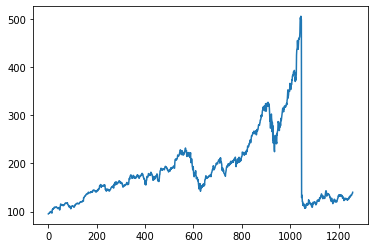

In [5]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [6]:
import numpy as np

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [8]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [9]:
training_size,test_size

(881, 378)

In [10]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [11]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 95
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [12]:
print(X_test.shape)
print(ytest.shape)

(282, 95)
(282,)


In [13]:
print(X_train.shape), print(y_train.shape)

(785, 95)
(785,)


(None, None)

In [14]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [15]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [16]:
#model=Sequential()
#model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
#model.add(LSTM(50,return_sequences=True))
#model.add(LSTM(50))
#model.add(Dense(1))
#model.compile(loss='mean_squared_error',optimizer='adam')


In [17]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
#model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=500,batch_size=64,verbose=1)

Epoch 1/500
13/13 [==============================] - 9s 273ms/step - loss: 0.0119 - val_loss: 0.0386
Epoch 2/500
13/13 [==============================] - 2s 176ms/step - loss: 0.0027 - val_loss: 0.0260
Epoch 3/500
13/13 [==============================] - 2s 175ms/step - loss: 0.0010 - val_loss: 0.0253
Epoch 4/500
13/13 [==============================] - 2s 178ms/step - loss: 5.2583e-04 - val_loss: 0.0294
Epoch 5/500
13/13 [==============================] - 2s 175ms/step - loss: 4.9739e-04 - val_loss: 0.0266
Epoch 6/500
13/13 [==============================] - 2s 175ms/step - loss: 4.5969e-04 - val_loss: 0.0244
Epoch 7/500
13/13 [==============================] - 2s 173ms/step - loss: 4.1196e-04 - val_loss: 0.0242
Epoch 8/500
13/13 [==============================] - 2s 175ms/step - loss: 3.8013e-04 - val_loss: 0.0256
Epoch 9/500
13/13 [==============================] - 2s 177ms/step - loss: 3.8489e-04 - val_loss: 0.0235
Epoch 10/500
13/13 [==============================] - 2s 177ms/step

In [20]:
import tensorflow as tf

In [21]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [22]:
print(X_train.shape)

(785, 95, 1)


In [23]:
print(train_predict.shape)

(785, 1)


In [24]:
##Transformback to original form----------very important
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [25]:
print(ytest.shape)

(282,)


In [26]:
ytest=ytest.reshape(282,1)
ytest=scaler.inverse_transform(ytest)

In [27]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

182.7044562678278

In [28]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

24.00255834547703

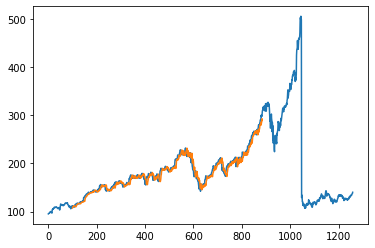

In [30]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
#testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()